In [189]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scikitplot as skplt
import scipy
%matplotlib inline
from scipy.stats import linregress
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from statistics import mean

In [14]:
ls

1533148882_failures.csv  HackDay4.ipynb           Untitled.ipynb


In [15]:
df = pd.read_csv("1533148882_failures.csv")

In [16]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [17]:
abs(df.corr()['failure']).sort_values(ascending = False)

failure       1.000000
attribute8    0.119055
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute3    0.000948
attribute6    0.000550
Name: failure, dtype: float64

In [18]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null object
device        124494 non-null object
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [111]:
def cutoffgreater(df_in, elem, cutoff):
    
    df_out = df_in[df_in[elem]<cutoff]
    NewTrainingdatasize = df_out.shape[0]
    
    return df_out, NewTrainingdatasize

In [109]:
def plotattributes(dfin):
    
    dfin = dfin.select_dtypes(exclude=['object'])
    
    for elem in dfin:
        plt.hist(df1[elem], bins=200)
        plt.yscale('log')

        plt.ylabel('counts', fontsize=13)
        plt.xlabel(str(elem), fontsize=13)
        plt.show()

In [113]:
abs(df.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.119055
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute6    0.000550
attribute3    0.000948
Name: failure, dtype: float64

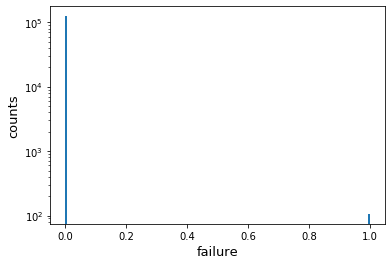

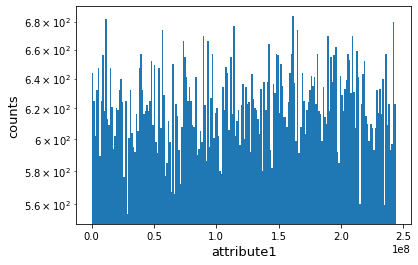

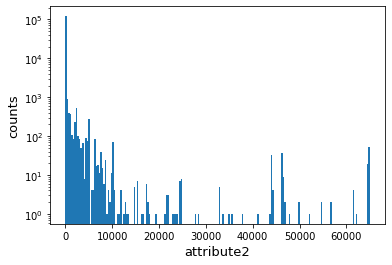

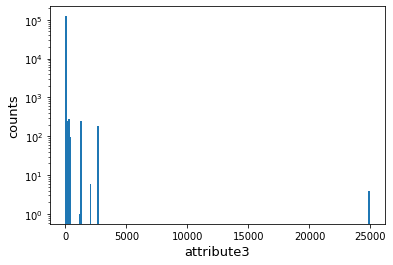

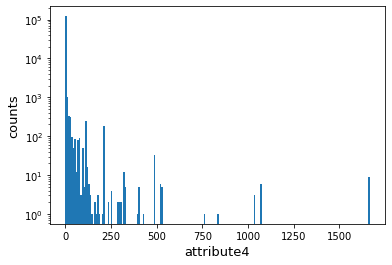

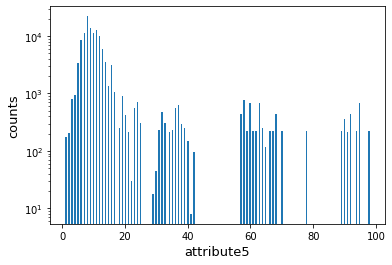

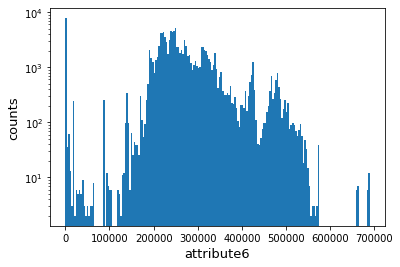

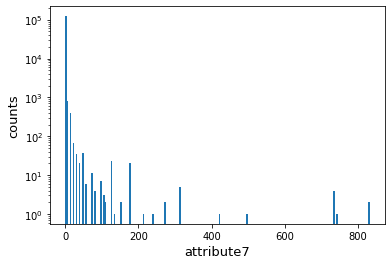

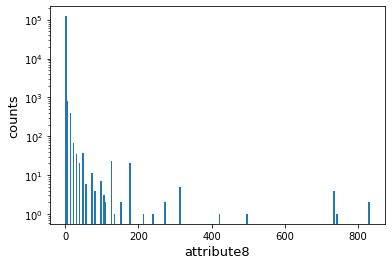

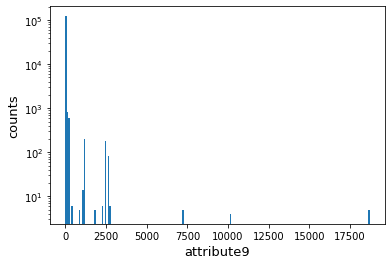

In [110]:
plotattributes(df)

In [171]:
y_fit.shape

(100000, 1)

In [237]:
def GenerateClassPlot(dfin, elem_x, elem_y):
    
    gbc = GradientBoostingClassifier()
    gbc.fit(dfin[elem_x].to_frame(), dfin[elem_y])
    x_pred = pd.DataFrame(np.linspace(0, dfin[elem_x].max(), dfin[elem_y].shape[0]))
    y_pred = pd.DataFrame(gbc.predict(x_pred))
    y_true = dfin[elem_y].to_frame()
    
    fig1 = plt.figure(figsize = (15,5))
    a = fig1.add_subplot(131)
    a.plot(x_pred, y_pred, 'r')
    a.scatter(df[elem_x].to_frame(), y_true)
    a.set_ylabel('Probability of Failure', fontsize=13)
    a.set_xlabel(str(elem_x), fontsize=13)

    
    b = fig1.add_subplot(132)
    b.hist(dfin[elem_x], bins=200)
    b.set_yscale('log')
    b.set_ylabel('counts', fontsize=13)
    b.set_xlabel(str(elem_x), fontsize=13)
    
    c = fig1.add_subplot(133)
    fpr, tpr, _ = roc_curve(y_true,  y_pred)
    auc = roc_auc_score(y_true, y_pred)
    c.plot(fpr,tpr,label="data 1, auc="+str(auc))
    c.set_ylabel('True Positive Rate', fontsize=13)
    c.set_xlabel('False Positive Rate', fontsize=13)
    c.legend(loc=4)
    
    


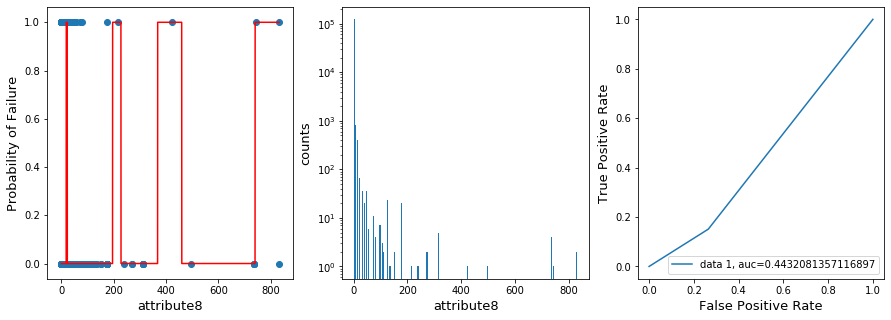

In [238]:
GenerateClassPlot(df, 'attribute8', 'failure')

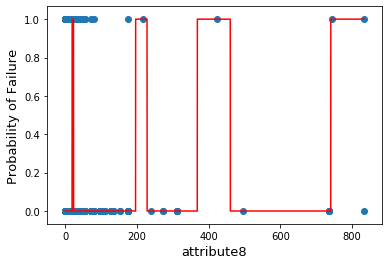

In [175]:
gbc = GradientBoostingClassifier()
gbc.fit(df['attribute8'].to_frame(), df['failure'])
x_pred = pd.DataFrame(np.linspace(0, df['attribute8'].max(), df['failure'].shape[0]))
y_pred = pd.DataFrame(gbc.predict(x_pred))
y_true = df['failure'].to_frame()
plt.plot(x_pred, y_pred, 'r')
plt.scatter(df['attribute8'].to_frame(), y_true)
plt.ylabel('Probability of Failure', fontsize=13)
plt.xlabel('attribute8', fontsize=13)
plt.show()




In [176]:
confusion_matrix(y_true, y_pred)

array([[91484, 32904],
       [   90,    16]])

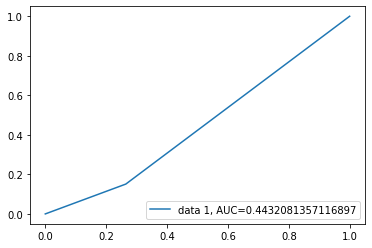

In [191]:
fpr, tpr, _ = roc_curve(y_true,  y_pred)
auc = roc_auc_score(y_true, y_pred)
plt.plot(fpr,tpr,label="data 1, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [142]:
y_predict.shape

(124494, 1)

In [143]:
y_true.shape

(124494, 1)

In [58]:
df['device'].astype(str).str[:4].unique()

array(['S1F0', 'S1F1', 'W1F0', 'W1F1', 'Z1F0', 'Z1F1', 'Z1F2'],
      dtype=object)

In [83]:
S1F0 = df[df['device'].astype(str).str[:4].str.contains('S1F0')]
S1F0.shape

(33169, 12)

In [84]:
S1F1 = df[df['device'].astype(str).str[:4].str.contains('S1F1')]
S1F1.shape

(21689, 12)

In [85]:
W1F0 = df[df['device'].astype(str).str[:4].str.contains('W1F0')]
W1F0.shape

(23294, 12)

In [94]:
W1F1 = df[df['device'].astype(str).str[:4].str.contains('W1F1')]
W1F1.shape

(19974, 12)

In [96]:
Z1F0 = df[df['device'].astype(str).str[:4].str.contains('Z1F0')]
Z1F0.shape

(18869, 12)

In [97]:
Z1F1 = df[df['device'].astype(str).str[:4].str.contains('Z1F1')]
Z1F1.shape

(7248, 12)

In [98]:
Z1F2 = df[df['device'].astype(str).str[:4].str.contains('Z1F2')]
Z1F2.shape

(251, 12)

In [90]:
abs(S1F0.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.124930
attribute7    0.124930
attribute4    0.075472
attribute2    0.054880
attribute6    0.009972
attribute1    0.008457
attribute5    0.004172
attribute3    0.002918
attribute9    0.003660
Name: failure, dtype: float64

In [91]:
abs(S1F1.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.169823
attribute7    0.169823
attribute2    0.149058
attribute4    0.035196
attribute5    0.009960
attribute6    0.004405
attribute9    0.000270
attribute3    0.001846
attribute1    0.010341
Name: failure, dtype: float64

In [92]:
abs(W1F0.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.201484
attribute7    0.201484
attribute4    0.101489
attribute2    0.101412
attribute9    0.036119
attribute5    0.007062
attribute6    0.002828
attribute1    0.001042
attribute3    0.002839
Name: failure, dtype: float64

In [95]:
abs(W1F1.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.133516
attribute7    0.133516
attribute4    0.032495
attribute1    0.014029
attribute2    0.012262
attribute5    0.000849
attribute9    0.003280
attribute3    0.003893
attribute6    0.012508
Name: failure, dtype: float64

In [99]:
abs(Z1F0.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute8    0.173086
attribute7    0.173086
attribute4    0.106899
attribute9    0.023889
attribute3    0.019859
attribute2    0.017798
attribute1    0.005500
attribute6    0.009443
attribute5    0.010399
Name: failure, dtype: float64

In [100]:
abs(Z1F1.corr()['failure'].sort_values(ascending = False))

failure       1.000000
attribute4    0.123531
attribute2    0.070831
attribute8    0.046748
attribute7    0.046748
attribute6    0.009109
attribute5    0.005035
attribute3    0.000165
attribute9    0.001273
attribute1    0.009059
Name: failure, dtype: float64

In [101]:
abs(Z1F2.corr()['failure'].sort_values(ascending = False))

failure      NaN
attribute1   NaN
attribute2   NaN
attribute3   NaN
attribute4   NaN
attribute5   NaN
attribute6   NaN
attribute7   NaN
attribute8   NaN
attribute9   NaN
Name: failure, dtype: float64

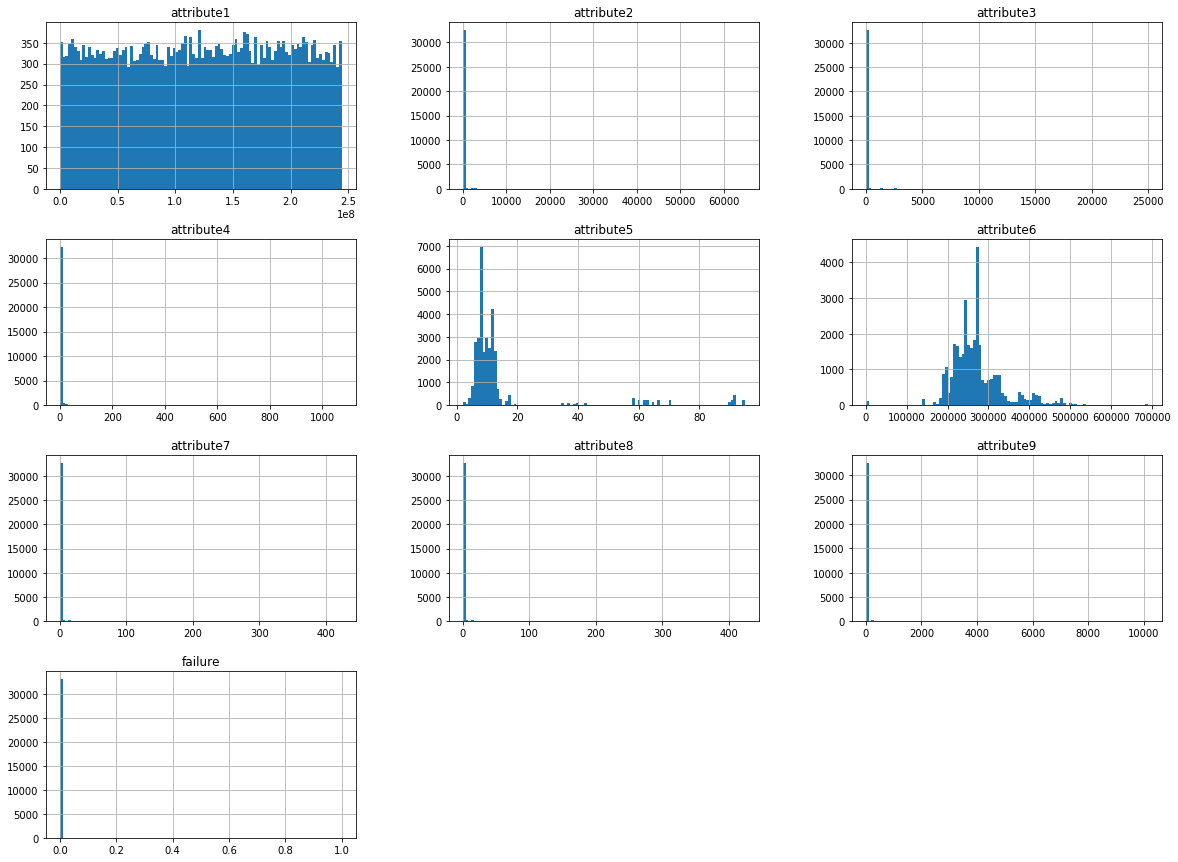

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
S1F0.hist(bins=100, figsize=(20,15))
plt.show()

In [69]:
#df.date.unique()

In [21]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [22]:
df1 = df.select_dtypes(exclude=['object'])
df2 = df.select_dtypes(include=['object'])

In [31]:
df1['attribute1'].max()

244140480

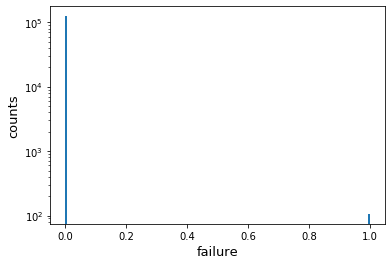

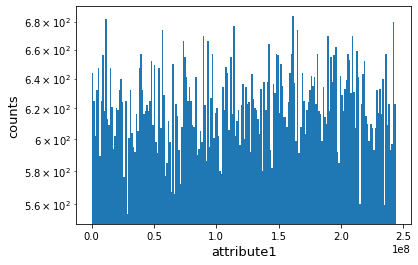

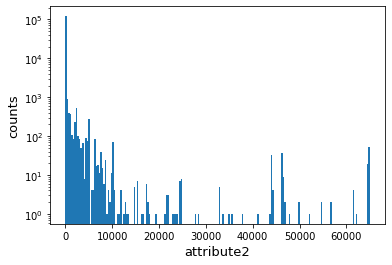

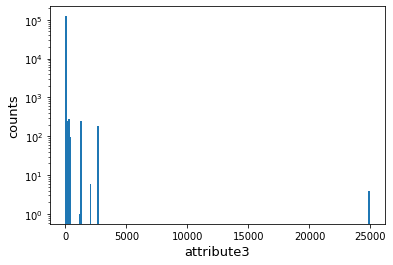

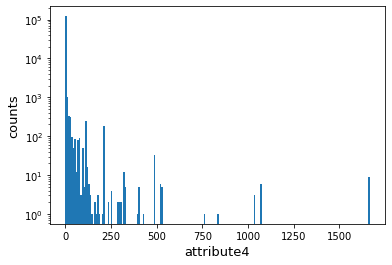

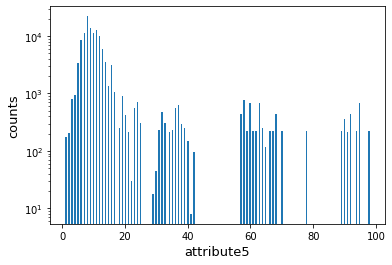

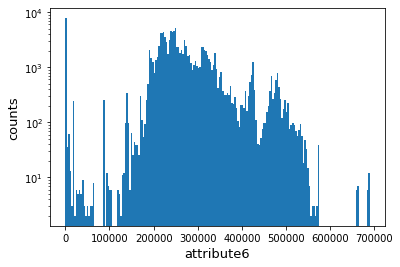

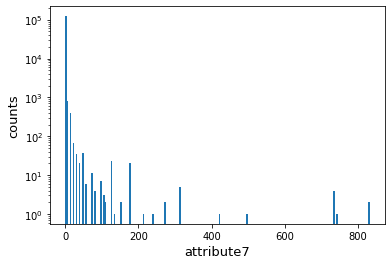

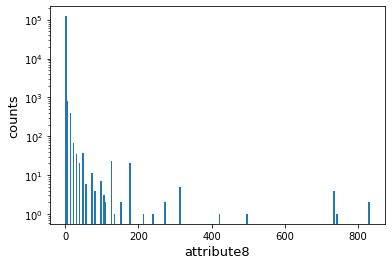

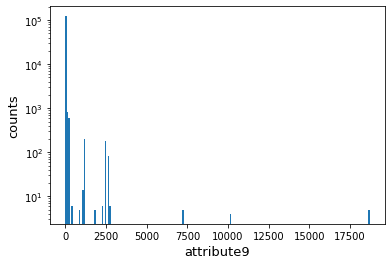

In [107]:
plotattributes(df)

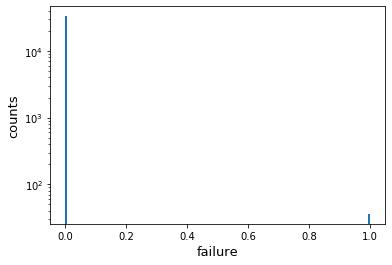

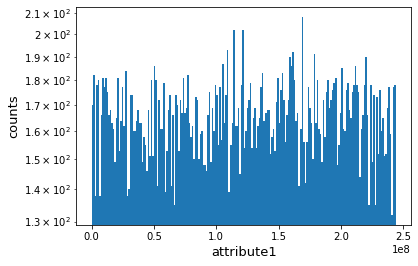

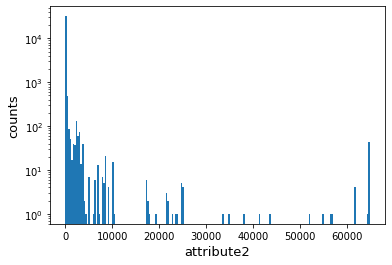

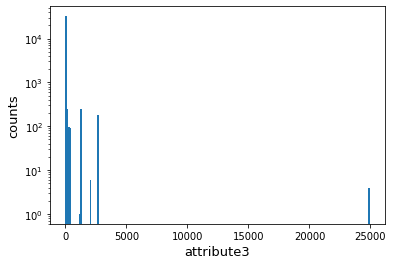

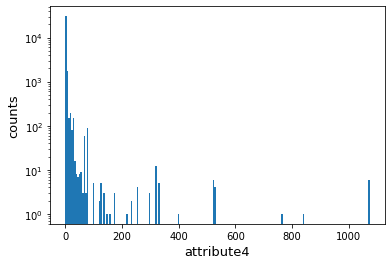

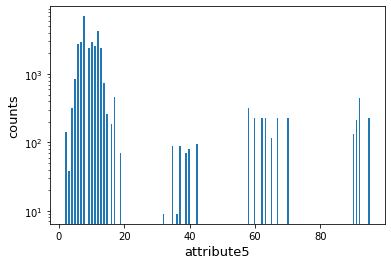

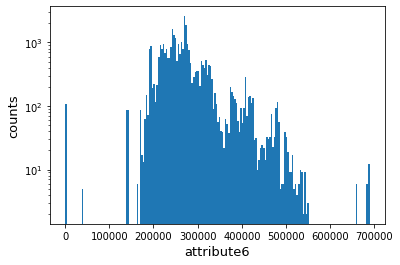

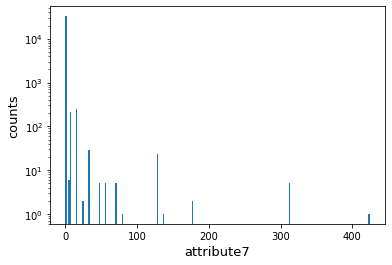

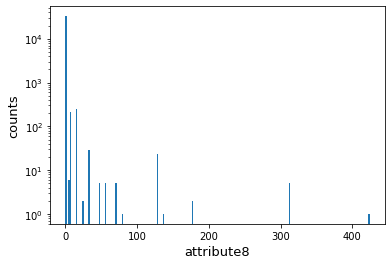

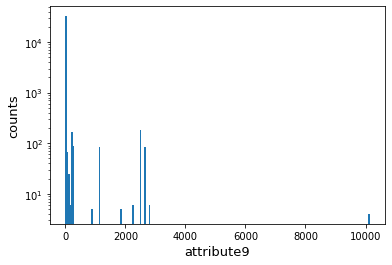

In [106]:
plotattributes(S1F0)

In [39]:
def cutoffgreater(df_in, elem, cutoff):
    
    df_out = df_in[df_in[elem]<cutoff]
    NewTrainingdatasize = df_out.shape[0]
    
    return df_out, NewTrainingdatasize

In [ ]:
df1, TrainingSize = cutoffgreater(df1, 'attribute2', 60000)
df1['attribute2'] = df1['attribute2'].apply(lambda x:np.log(x+1))

In [ ]:
df1['attribute2'].hist(bins=100, figsize=(5,5))

In [ ]:
df1['attribute3'].unique()

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
def OptimalRegression(XData, y):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    log = LogisticRegression()
    gbc = GradientBoostingClassifier()
    d = DecisionTreeClassifier()
    r = RandomForestClassifier()
    
    algorithms = [g,b,k,log,d,r]
    names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic','Single Tree','Random Forest']

    # fit the data
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(XData, y)
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y, algorithms[i].predict(XData)))
        precision.append(precision_score(y, algorithms[i].predict(XData)))
        recall.append(recall_score(y, algorithms[i].predict(XData)))
        f1.append(f1_score(y, algorithms[i].predict(XData)))
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('F1', ascending = False)

In [42]:
OptimalRegression(df1.drop(['failure'], axis=1), df1['failure'])

,Accuracy,Precision,Recall,F1
Single Tree,0.999992,1.000000,0.990566,0.995261
Random Forest,0.999767,1.000000,0.726415,0.841530
BernoulliNB,0.993148,0.039457,0.301887,0.069793
GaussianNB,0.997405,0.034335,0.075472,0.047198
K Nearest,0.999149,0.000000,0.000000,0.000000
Logistic,0.999149,0.000000,0.000000,0.000000
